# TCC PUC - Ciência de Dados e Big Data


# 1. Definição do Problema

# 2. Coleta dos Dados

## 2.1 Extração dos Dados

In [1]:
import json
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt # lib para utilização dos gráficos

# Necessário para visualização automática dos gráficos no Jupyter
%matplotlib inline

from pathlib import Path
from urllib.request import urlopen # Faz a requisição no servidor e obtem a resposta
from pandas import json_normalize #package for flattening json in pandas df

# Abrindo arquivo json de coleta dos dados na fonte 
p = Path(r'C:\Users\karen\Desktop\TCC_PUC_BigData\data\data-cars.json')

# read json
with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())
                      
df_cars = json_normalize(data)
df_cars.head() # exibe DataFrame

,UniqueId,PhotoPath,ListingType,ProductCode,Channels,FipePercent,GoodDeal,IPVApaid,Licensed,Warranty,...,Seller.AdType.id,Seller.AdType.Value,Seller.BudgetInvestimento,Seller.DealerScore,Seller.CarDelivery,Seller.TrocaComTroco,Prices.Price,Prices.SearchPrice,LongComment,VipAutopago
0,35947616,2021\202102\20210218\honda-civic-1.8-lxs-16v-f...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",87.0,True,True,True,False,...,4,Pessoa Física,0,0,False,False,41800.0,41800.0,NaN,NaN
1,35942766,2021\202102\20210217\land-rover-discovery-4-3....,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",111.0,NaN,True,True,False,...,4,Pessoa Física,0,0,False,False,115000.0,115000.0,"Vendo discovery 4 diesel único dono, carro de ...",NaN
2,35243486,2020\202012\20201214\land-rover-range-rover-sp...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",99.0,NaN,True,True,False,...,4,Pessoa Física,0,0,False,False,140000.0,140000.0,Veiculo Blindado !!! Carro Para Pessoas Exigen...,NaN
3,22874861,2021\202101\20210123\bmw-750i-4.4-m-sport-seda...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",86.0,True,False,True,True,...,4,Pessoa Física,0,0,False,False,420000.0,420000.0,NaN,NaN
4,35946386,2021\202102\20210218\ford-fusion-2.0-titanium-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",85.0,True,True,True,False,...,4,Pessoa Física,0,0,False,False,72800.0,72800.0,NaN,NaN


In [2]:
# Abrindo arquivo json de coleta dos dados da tabela Fipe
p = Path(r'C:\Users\karen\Desktop\TCC_PUC_BigData\data\data-cars-fipe.json')

# read json
with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())
                      
df_cars_fipe = json_normalize(data)
df_cars_fipe.head() # exibe DataFrame

,Fipe,UniqueId
0,48245.0,35947616
1,103237.0,35942766
2,140963.0,35243486
3,490591.0,22874861
4,85577.0,35946386


In [3]:
#Unindo os datasets infos detalhes do carro
df_cars = df_cars.join(df_cars_fipe.set_index('UniqueId')[['Fipe']], on='UniqueId')
df_cars

,UniqueId,PhotoPath,ListingType,ProductCode,Channels,FipePercent,GoodDeal,IPVApaid,Licensed,Warranty,...,Seller.AdType.Value,Seller.BudgetInvestimento,Seller.DealerScore,Seller.CarDelivery,Seller.TrocaComTroco,Prices.Price,Prices.SearchPrice,LongComment,VipAutopago,Fipe
0,35947616,2021\202102\20210218\honda-civic-1.8-lxs-16v-f...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",87.0,True,True,True,False,...,Pessoa Física,0,0,False,False,41800.0,41800.0,NaN,NaN,48245.0
1,35942766,2021\202102\20210217\land-rover-discovery-4-3....,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",111.0,NaN,True,True,False,...,Pessoa Física,0,0,False,False,115000.0,115000.0,"Vendo discovery 4 diesel único dono, carro de ...",NaN,103237.0
2,35243486,2020\202012\20201214\land-rover-range-rover-sp...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",99.0,NaN,True,True,False,...,Pessoa Física,0,0,False,False,140000.0,140000.0,Veiculo Blindado !!! Carro Para Pessoas Exigen...,NaN,140963.0
3,22874861,2021\202101\20210123\bmw-750i-4.4-m-sport-seda...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",86.0,True,False,True,True,...,Pessoa Física,0,0,False,False,420000.0,420000.0,NaN,NaN,490591.0
4,35946386,2021\202102\20210218\ford-fusion-2.0-titanium-...,U,674,"[{'id': 48, 'Value': 'Webmotors'}]",85.0,True,True,True,False,...,Pessoa Física,0,0,False,False,72800.0,72800.0,NaN,NaN,85577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,35704350,2021\202101\20210127\kia-soul-1.6-ex-u.163-16v...,U,4675,"[{'id': 48, 'Value': 'Webmotors'}]",111.0,NaN,False,True,False,...,Loja,0,0,True,True,41900.0,41900.0,GA MULTIMARCAS HÁ MAIS DE 10 ANOS COMERCIALIZA...,NaN,37586.0
932,35436022,2021\202101\20210105\citroen-xsara-picasso-2.0...,U,1606,"[{'id': 48, 'Value': 'Webmotors'}]",97.0,NaN,False,True,False,...,Loja,0,3,False,True,13800.0,13800.0,EXCEPCIONALMENTE PARA ESTE VEICULO DE NOSSO ES...,NaN,14229.0
933,35092482,2021\202101\20210129\fiat-siena-1.0-mpi-fire-c...,U,2612,"[{'id': 48, 'Value': 'Webmotors'}]",95.0,True,False,False,False,...,Loja,0,3,True,False,16320.0,16320.0,Carro será periciado na finalização do process...,NaN,17145.0
934,35707658,2021\202102\20210219\renault-sandero-1.0-12v-s...,U,2612,"[{'id': 48, 'Value': 'Webmotors'}]",85.0,True,True,True,False,...,Loja,0,0,True,False,49500.0,49500.0,O Seminovo mais novo do Brasil está na Localiz...,NaN,57984.0


# 3. Tratamento dos Dados

Nessa seção é analisado os dados que são necessários para continuidade do trabalho.
Os dados necessários serão formatados e/ou utilizado filtros se necessário.
Os dados que não forem necessários serão removidos.

## 3.1 Dados dos Carros

Removendo colunas desnecessárias

In [4]:
del df_cars['Channels'] # Coluna Channels - Canal de origem da venda
del df_cars['ListingType'] # Coluna Tipo de Listagem
del df_cars['ProductCode'] # Coluna Código Produto
del df_cars['PhotoPath'] # Coluna PhotoPath
#del df_cars['UniqueId'] # Coluna UniqueId
del df_cars['FipePercent'] # Coluna FipePercent

del df_cars['LongComment'] # Coluna LongComment - comentários do vendedor

del df_cars['VipAutopago'] # Coluna VipAutopago

# A Webmotors destaca com o selo de Alerta Super preço veículos anunciados com valor de 5 a 15%  abaixo da média FIPE
# Essa coluna será removida, pois utilizaremos outros parâmetros para classificar como bom negócio (não apenas o valor FIPE)
del df_cars['GoodDeal'] # Coluna Bom Negócio? (baseado no valor da tabela FIPE)

# Group - Media
del df_cars['Media.Photos'] # Coluna Fotos Mídia

# Group - Seller
del df_cars['Seller.Id'] # Coluna tipo de venda Id
del df_cars['Seller.SellerType'] # Coluna tipo de venda Id (PF, PJ)
del df_cars['Seller.AdType.id'] # Coluna tipo de venda Id (Pessoa Física, Pessoa Jurídica)
del df_cars['Seller.AdType.Value'] # Coluna tipo de venda Value (Pessoa Física, Pessoa Jurídica)
del df_cars['Seller.CarDelivery'] # Coluna Entrega do Carro (true, false)
del df_cars['Seller.TrocaComTroco'] # Coluna Seller.TrocaComTroco
del df_cars['Seller.BudgetInvestimento'] # Coluna BudgetInvestimento
del df_cars['Seller.DealerScore'] # Coluna DealerScore
del df_cars['Seller.City'] # Coluna Seller.City
del df_cars['Seller.State'] # Coluna Seller.State

# Group - Prices
del df_cars['Prices.SearchPrice'] # Coluna Prices.SearchPrice valor utilizado no campo busca do site

# Group - Specification
del df_cars['Specification.NumberPorts'] # Coluna NumberPorts
del df_cars['Specification.Transmission'] # Coluna Transmission
del df_cars['Specification.Make.id'] # Coluna Specification.Make.id
del df_cars['Specification.Version.id'] # Coluna Specification.Version.id
del df_cars['Specification.Version.Value'] # Coluna Specification.Version.Value
del df_cars['Specification.Model.id'] # Coluna Especificação do Modelo Id
del df_cars['Specification.Color.IdPrimary'] # Coluna Specification.Color.IdPrimary id da cor
del df_cars['Specification.Color.Primary'] # Coluna Specification.Color.IdPrimary id da cor
del df_cars['Specification.VehicleAttributes'] # Coluna Specification.VehicleAttributes (atributos já organizados em forma de colunas)
del df_cars['Specification.YearFabrication'] # Coluna Specification.YearFabrication, consideraremos o ano do Modelo do carro



Renomeando o nome das colunas

In [5]:
df_cars.rename({'Specification.Title': 'Title', 
                'Specification.Make.Value': 'Make',
                'Specification.Model.Value': 'Model',
                'Specification.Version.Value': 'Version',
                'Specification.YearModel': 'YearModel',
                'Specification.YearFabrication': 'YearFabrication',
                'Specification.Odometer': 'Odometer',
                'Specification.Transmission': 'Transmission',
                'Specification.NumberPorts': 'NumberPorts',
                'Specification.BodyType': 'BodyType',
                'Specification.Armored': 'Armored',
                'Specification.Color.Primary': 'Color',
                'Prices.Price': 'Price'
               }, axis=1, inplace=True)

Formatando os dados

In [6]:
# Visualizando informações sobre os dados antes da formatação
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UniqueId   936 non-null    int64  
 1   IPVApaid   936 non-null    bool   
 2   Licensed   936 non-null    bool   
 3   Warranty   936 non-null    bool   
 4   OnlyOwner  936 non-null    bool   
 5   Title      936 non-null    object 
 6   Make       936 non-null    object 
 7   Model      936 non-null    object 
 8   YearModel  936 non-null    float64
 9   Odometer   936 non-null    float64
 10  BodyType   936 non-null    object 
 11  Armored    936 non-null    object 
 12  Price      936 non-null    float64
 13  Fipe       936 non-null    float64
dtypes: bool(4), float64(4), int64(1), object(5)
memory usage: 76.9+ KB


In [7]:
# Convertendo o ano de Float64 para Int64 (obs: o ano modelo está vindo como float 1 casa decimal)
df_cars['YearModel'] = df_cars['YearModel'].astype('int64')

# Comentários vazios estão vindo como NaN
#df_cars['LongComment'] = df_cars['LongComment'].fillna('')

# Convertendo dados que estão como object para string
df_cars['Title'] = df_cars['Title'].astype('string')
df_cars['Make'] = df_cars['Make'].astype('string')
df_cars['Model'] = df_cars['Model'].astype('string')
#df_cars['Transmission'] = df_cars['Transmission'].astype('string')
df_cars['BodyType'] = df_cars['BodyType'].astype('string')
#df_cars['Color'] = df_cars['Color'].astype('string')
#df_cars['LongComment'] = df_cars['LongComment'].astype('string')

# Convertendo dados que estão como object para Int64
#df_cars['NumberPorts'] = df_cars['NumberPorts'].astype('int64')

# Convertendo coluna Armored de (S-Sim e N-Não) para (True-Sim e False-Não)
df_cars['Armored'] = np.where(df_cars['Armored'] == 'S', True,False)



In [8]:
#Verifica se existe algum valor nulo após o tratamento dos dados
df_cars.isnull().sum()

UniqueId     0
IPVApaid     0
Licensed     0
Warranty     0
OnlyOwner    0
Title        0
Make         0
Model        0
YearModel    0
Odometer     0
BodyType     0
Armored      0
Price        0
Fipe         0
dtype: int64

In [9]:
# Visualizando informações sobre os dados já formatados
df_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UniqueId   936 non-null    int64  
 1   IPVApaid   936 non-null    bool   
 2   Licensed   936 non-null    bool   
 3   Warranty   936 non-null    bool   
 4   OnlyOwner  936 non-null    bool   
 5   Title      936 non-null    string 
 6   Make       936 non-null    string 
 7   Model      936 non-null    string 
 8   YearModel  936 non-null    int64  
 9   Odometer   936 non-null    float64
 10  BodyType   936 non-null    string 
 11  Armored    936 non-null    bool   
 12  Price      936 non-null    float64
 13  Fipe       936 non-null    float64
dtypes: bool(5), float64(3), int64(2), string(4)
memory usage: 70.5 KB


# 4. Análise e Exploração dos Dados 

## 4.1 Analisando os Dados

In [10]:
# Carros que estão abaixo da tabela FIPE e IPVA Pago
cars = (df_cars['Price'] < df_cars['Fipe']) & (df_cars['IPVApaid'])
df_cars[cars].shape[0]


288

In [11]:
# Carros que estão acima da tabela FIPE
cars = (df_cars['Price'] > df_cars['Fipe']) 
df_cars[cars][['Fipe', 'Price']]

,Fipe,Price
1,103237.0,115000.0
6,118552.0,159900.0
22,82397.0,85000.0
24,408190.0,409900.0
25,33645.0,34900.0
...,...,...
924,64221.0,66900.0
925,0.0,23980.0
926,85060.0,94880.0
930,0.0,38990.0


In [12]:
# Essa coluna identificará se o valor do carro está acima ou abaixo do valor da tabela Fipe (True-sim, False-não)
df_cars['PriceFipeOk'] = (df_cars['Price'] <= df_cars['Fipe']) 

# Essa coluna identificará se o veículo tem mais de 10 anos (True- sim, False-não)
now = datetime.datetime.now() # Pega a data atual 

df_cars['Year>10Years'] = (now.year - df_cars['YearModel'] > 10) # verifica se a diferença do ano é superior a 10

df_cars

,UniqueId,IPVApaid,Licensed,Warranty,OnlyOwner,Title,Make,Model,YearModel,Odometer,BodyType,Armored,Price,Fipe,PriceFipeOk,Year>10Years
0,35947616,True,True,False,True,HONDA CIVIC 1.8 LXS 16V FLEX 4P MANUAL,HONDA,CIVIC,2014,55000.0,Sedã,False,41800.0,48245.0,True,False
1,35942766,True,True,False,True,LAND ROVER DISCOVERY 4 3.0 S 4X4 V6 24V BI-TUR...,LAND ROVER,DISCOVERY 4,2012,82000.0,Utilitário esportivo,False,115000.0,103237.0,False,False
2,35243486,True,True,False,True,LAND ROVER RANGE ROVER SPORT 3.0 HSE 4X4 V6 24...,LAND ROVER,RANGE ROVER SPORT,2013,81048.0,Utilitário esportivo,True,140000.0,140963.0,True,False
3,22874861,False,True,True,True,BMW 750Li 4.4 M SPORT V8 32V GASOLINA 4P AUTOM...,BMW,750Li,2017,41839.0,Sedã,False,420000.0,490591.0,True,False
4,35946386,True,True,False,True,FORD FUSION 2.0 TITANIUM AWD 16V GASOLINA 4P A...,FORD,FUSION,2016,35000.0,Sedã,False,72800.0,85577.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,35704350,False,True,False,True,KIA SOUL 1.6 EX U.163 16V FLEX 4P MANUAL,KIA,SOUL,2013,68000.0,Minivan,False,41900.0,37586.0,False,False
932,35436022,False,True,False,False,CITROËN XSARA PICASSO 2.0 GLX 16V GASOLINA 4P ...,CITROËN,XSARA PICASSO,2005,172975.0,Minivan,False,13800.0,14229.0,True,True
933,35092482,False,False,False,False,FIAT SIENA 1.0 MPI FIRE CELEBRATION 8V FLEX 4P...,FIAT,SIENA,2008,187761.0,Sedã,False,16320.0,17145.0,True,True
934,35707658,True,True,False,True,RENAULT SANDERO 1.0 12V SCE FLEX ZEN MANUAL,RENAULT,SANDERO,2020,50033.0,Hatchback,False,49500.0,57984.0,True,False


In [13]:
# Estatísticas descritivas
'''
Teremos como resultado um DataFrame com as colunas count a frequência; mean a média; std o desvio padrão; mino valor mínimo; 25% o primeiro quartio, 50% a mediana, 75% o terceiro quartio e max, o valor máximo.
'''
df_cars['Odometer'].describe().round(2)

#df_cars['Odometer'].aggregate(['min', 'max', 'sum'])

count       936.00
mean      67729.62
std       47358.48
min           0.00
25%       31145.50
50%       60370.00
75%       96136.50
max      375000.00
Name: Odometer, dtype: float64

In [14]:
# Agrupa e exibe carros pelo preço médio de cada marca.
cars_group_make_mean = df_cars.groupby(['Make'], as_index=False)

# Exibe colunas:
# Model: valor único (agrupado)
# Preço: média de preço daquela Marca 
cars_group_make_mean = cars_group_make_mean.agg({'Price':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para aprensentá-las
cars_group_make_mean = cars_group_make_mean.rename(columns={'Make':'Marca','Price':'Preço Médio', 'UniqueId': 'Quantidade'})

# Ordenando em ordem Decrescente pela coluna modelo
cars_group_make_mean = cars_group_make_mean.sort_values('Marca', ascending=True)

cars_group_make_mean


,Marca,Preço Médio,Quantidade
0,ALFA ROMEO,35000.00,1
1,AUDI,135663.76,42
2,BMW,216739.14,66
3,CADILLAC,120000.00,1
4,CHERY,87449.50,2
5,CHEVROLET,65608.41,64
6,CHRYSLER,38500.00,3
7,CITROËN,29749.66,29
8,DODGE,252111.25,8
9,FIAT,42765.53,36


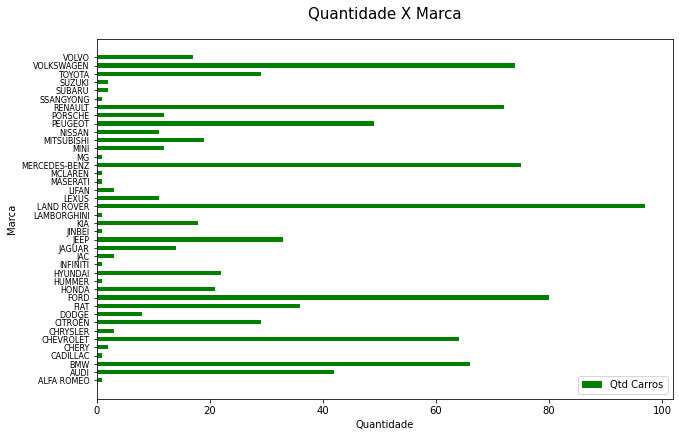

In [15]:
# Gráfico Quantidade de Carros de cada Marca

# Pega o resultado do agrupamento (Preço Médio + Modelo) para exibir no gráfico
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices das marcas
indice = np.arange(len(cars_group_make_mean))

eixo.barh(indice, cars_group_make_mean['Quantidade'].round(), align='center', height=0.5,  tick_label=cars_group_make_mean['Marca'], color="green")

# Alterando Título e Labels
eixo.set_title('Quantidade X Marca', fontsize=15, pad=20)
eixo.set_xlabel('Quantidade')
eixo.set_ylabel('Marca')

eixo.set_yticks(indice)
eixo.set_yticklabels(cars_group_make_mean['Marca'], fontsize=8)

# Adicionando Legenda
eixo.legend(['Qtd Carros'], loc = 'lower right')

In [16]:
# Agrupa e exibe carros pelo número médio de km rodados por ano por modelo
cars_group_model_mean_km_year = df_cars.groupby(['Model', 'YearModel'], as_index=False)

# Exibe colunas:
# Model: valor único (agrupado)
# YearModel: valor único (agrupado)
# Odometer: média de km daquele modelo 
cars_group_model_mean_km_year = cars_group_model_mean_km_year.agg({'Odometer':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para aprensentá-las
cars_group_model_mean_km_year = cars_group_model_mean_km_year.rename(columns={'Model':'Modelo', 'YearModel':'Ano Modelo','Odometer':'Km Médio', 'UniqueId': 'Quantidade'})

cars_group_model_mean_km_year


,Modelo,Ano Modelo,Km Médio,Quantidade
0,118i,2011,137000.0,1
1,125i,2013,71918.0,1
2,125i,2014,65000.0,1
3,130i,2007,72000.0,1
4,164,1994,113000.0,1
...,...,...,...,...
633,YARIS,2019,14153.0,1
634,Z4,2020,11000.0,1
635,ZAFIRA,2002,199999.0,1
636,ZAFIRA,2006,136000.0,1


In [17]:
# Agrupa os carros por Ano e Calcula a Média e a Quantidade por Ano

# Agrupa por ano e remove o index (YearModel)
cars_group_mean_year = df_cars.groupby(['YearModel'], as_index=False)

# Exibe colunas:
# YearModel: valor único (agrupado)
# Odometer: média de valores (Km)
# UniqueId: quantidade de registros 
cars_group_mean_year = cars_group_mean_year.agg({'YearModel': np.unique, 'Odometer':np.mean, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para aprensentá-las
cars_group_mean_year = cars_group_mean_year.rename(columns={'YearModel':'Ano','Odometer':'Km', 'UniqueId': 'Quantidade'})

# Ordenando em ordem Decrescente pela coluna ano
cars_group_mean_year = cars_group_mean_year.sort_values('Ano', ascending=False)
#.reset_index()

cars_group_mean_year



,Ano,Km,Quantidade
27,2021,937.93,15
26,2020,26328.22,152
25,2019,20848.26,68
24,2018,34704.39,71
23,2017,50102.30,67
22,2016,59093.39,70
21,2015,70943.27,67
20,2014,73884.52,77
19,2013,88048.66,64
18,2012,93009.81,81


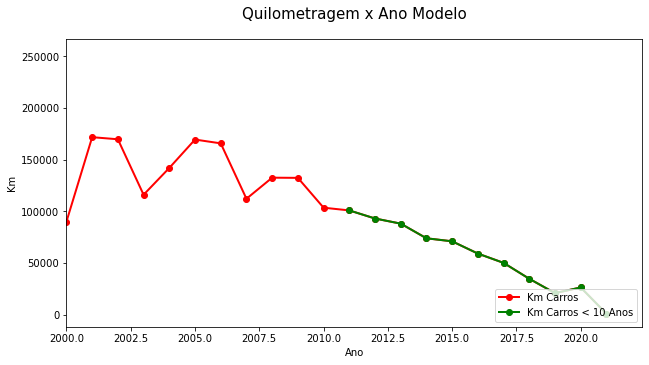

In [18]:
# Gráfico variação de Quilometragem e Ano do carro

# Pega o resultado do agrupamento (Ano + Quilometragem) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando gráfico
eixo.plot(cars_group_mean_year['Ano'], cars_group_mean_year['Km'], color= 'red', lw=2, marker = 'o')

# Exibe no gráfico somente os carros entre [2000 - Ano Atual]
eixo.set_xlim(2000)

# Adicionando cor de destaque para carros que ainda estão entre 10 anos 
cars_10_years = 2020 - cars_group_mean_year['Ano']  < 10
eixo.plot(cars_group_mean_year[cars_10_years]['Ano'], cars_group_mean_year[cars_10_years]['Km'], color= 'green', lw=2, marker = 'o')

# Alterando Título e Labels
eixo.set_title('Quilometragem x Ano Modelo', fontsize=15, pad=20)
eixo.set_ylabel('Km')
eixo.set_xlabel('Ano')

# Adicionando Legenda
eixo.legend(['Km Carros', 'Km Carros < 10 Anos'], loc = 'lower right')


### Preço Fipe (OK ou Não) das 10 Maiores Marcas

In [19]:
# Agrupa os carros por Make e quantidade de carros com PriceFipeOk (True or False)
# obs: Consideremos apenas as 10 maiores marcas de carro 
# https://www.noticiasautomotivas.com.br/marcas-de-carro-as-10-maiores-e-melhores-do-mundo/
make_top_10 = ['TOYOTA','VOLKSWAGEN','FORD','HONDA','NISSAN','HYUNDAI','CHEVROLET','KIA','MERCEDES-BENZ','BMW']

# Agrupa por marca e remove o index (Make)  
cars_group_make_fipe = pd.get_dummies(df_cars, columns=['PriceFipeOk']).groupby(['Make'], as_index=False).sum()

# Renomeando as colunas para aprensentá-las 
cars_group_make_fipe = cars_group_make_fipe.rename(columns={'Make':'Marca', 'PriceFipeOk_True':'Preço Fipe OK', 'PriceFipeOk_False':'Preço Fipe Não OK'})

# Exibe colunas:
# Make: valor único (agrupado)
# PriceFipeOk_True: quantidade de registros Preço Fipe OK
# PriceFipeOk_False: quantidade de registros Preço Fipe Não OK
cars_group_make_fipe = cars_group_make_fipe[['Marca', 'Preço Fipe OK', 'Preço Fipe Não OK']]

# Pega apenas os registros que estão com o Preço Fipe OK (PriceFipeOk) e que estão entre as 10 maiores marcas veículos
cars_group_make_fipe = cars_group_make_fipe[(cars_group_make_fipe['Marca'].isin(make_top_10))]

cars_group_make_fipe

,Marca,Preço Fipe OK,Preço Fipe Não OK
2,BMW,37,29
5,CHEVROLET,28,36
10,FORD,50,30
11,HONDA,5,16
13,HYUNDAI,5,17
19,KIA,9,9
26,MERCEDES-BENZ,39,36
30,NISSAN,3,8
37,TOYOTA,8,21
38,VOLKSWAGEN,38,36


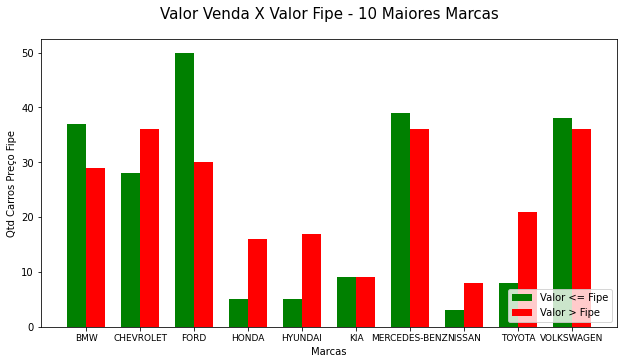

In [20]:
# Gráfico variação de Marcas e Preço Fipe

# Pega o resultado do agrupamento (Marca + Preço Fipe) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

# Adicionando os Índices das marcas
indice = np.arange(len(cars_group_make_fipe))

width = 0.35  # tamanho das barras

# Adicionando barras Preço <= Valor Fipe
eixo.bar(indice - width/2, cars_group_make_fipe['Preço Fipe OK'], width, color= 'green')

# Adicionando barras Preço > Valor Fipe
eixo.bar(indice + width/2, cars_group_make_fipe['Preço Fipe Não OK'], width, color= 'red')

# Alterando Título e Labels
eixo.set_title('Valor Venda X Valor Fipe - 10 Maiores Marcas', fontsize=15, pad=20)
eixo.set_xlabel('Marcas')
eixo.set_ylabel('Qtd Carros Preço Fipe')

eixo.set_xticks(indice)
eixo.set_xticklabels(cars_group_make_fipe['Marca'], fontsize=9)

# Adicionando Legenda
eixo.legend(['Valor <= Fipe', 'Valor > Fipe'], loc = 'lower right')



In [21]:
# Agrupa os carros onde PriceFipeOk (o valor está <= ao valor da tabela Fipe ou valor > valor da tabela Fipe)

# Fazer agrupamento somente com carros com ano <= 10 anos
cars_10_years = 2020 - df_cars['YearModel']  <= 10

# Agrupa por PriceFipeOk e remove o index (PriceFipeOk)
# somente para carros onde ano <= 10
cars_group_fipe_10_years = df_cars[cars_10_years].groupby(['PriceFipeOk'], as_index=False)

# Exibe colunas:
# PriceFipeOk: valor único (agrupado)
# UniqueId: quantidade de registros 
cars_group_fipe_10_years = cars_group_fipe_10_years.agg({'PriceFipeOk': np.unique, 'UniqueId': np.size}).round(2)

# Renomeando as colunas para aprensentá-las
cars_group_fipe_10_years = cars_group_fipe_10_years.rename(columns={'PriceFipeOk':'Preço Fipe OK', 'UniqueId': 'Quantidade'})


# Alterando os valores das linhas da coluna Preço Fipe OK para o label text
# obs: Isso facilitará no uso do gráfico logo abaixo
cars_group_fipe_10_years.loc[cars_group_fipe_10_years['Preço Fipe OK'] == True, ['Preço Fipe OK']] = 'Valor <= Fipe'
cars_group_fipe_10_years.loc[cars_group_fipe_10_years['Preço Fipe OK'] == False, ['Preço Fipe OK']] = 'Valor > Fipe'

# Cálculando a Porcentagem da coluna Quantidade 
# obs: Essa coluna será usada no gráfico abaixo
cars_group_fipe_10_years['Porcentagem'] = (cars_group_fipe_10_years['Quantidade'] / cars_group_fipe_10_years['Quantidade'].sum()) * 100

# ordena o Dataframe para apresentar primeiro os valores Valor > Fipe e posteriormente Valor <= Fipe
# obs: isso garantirá no gráfico esta ordem para utilização da configuração de cores
cars_group_fipe_10_years = cars_group_fipe_10_years.sort_values(by=['Preço Fipe OK'], ascending=False)

cars_group_fipe_10_years

,Preço Fipe OK,Quantidade,Porcentagem
0,Valor > Fipe,413,49.639423
1,Valor <= Fipe,419,50.360577


Text(0.5, 1.0, 'Porcentagem de Carros X Preço Fipe (até 10 anos)')

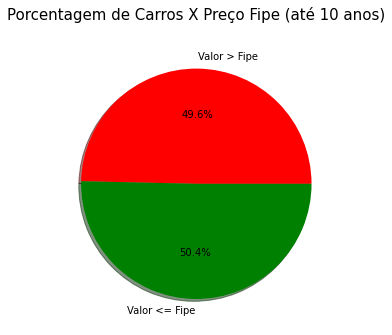

In [22]:
# Gráfico Quantidade de Carros Preço Fipe (valor <= valor Fipe e valor > valor Fipe)

# Pega o resultado do agrupamento (Marca + Preço Fipe) para exibir no gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.pie(cars_group_fipe_10_years['Porcentagem'], labels=cars_group_fipe_10_years['Preço Fipe OK'], autopct='%.1f%%', colors=['red', 'green'], shadow=True)

# Alterando Título e Labels
eixo.set_title('Porcentagem de Carros X Preço Fipe (até 10 anos)', fontsize=15, pad=20)